# Part 1

## Links

#### GitHub Repo: 
https://github.com/fheflo1/IND320

#### Streamlit App: 
https://ind320-fheflo1.streamlit.app/

## AI Usage and Reflections 

I started by using AI to structure my project and create a backlog from the task description. It also helped a lot during development, where I worked stepwise and fixed mistakes the AI made. I replaced deprecated functionality with modern alternatives that the AI didn’t catch. AI was treated as an assistant and a workhorse that gave the project devlopment high efficiency. 

## Compulsory Work 

I enjoyed working on this assignment, especially the combination of Jupyter Notebooks and a Streamlit app. At first I didn’t see the point of plotting in the notebook when the app would also produce plots. After doing both, I now appreciate the different roles: the notebook is my development and documentation space where I can explore the data step by step, keep a clear reasoning trail, and ensure results are reproducible; the Streamlit app is for interaction and communication, making it easy for users to select variables, change filters, and immediately see the outcomes. 

GitHub Projects was essential for my workflow. I broke the assignment into small issues and moved them across the board as I worked. This kept me motivated, completing each card felt like progress, and it also made the project safer. I developed new features on branches and opened pull requests to review changes before merging. If I broke something, the damage stayed on a branch instead of polluting main. This discipline, even on a small project, pays off quickly.

For the Streamlit app, I made a few deliberate design choices. The task suggested using st.selectbox on the third page, but I replaced it with st.multiselect. This lets the user compare multiple columns at once, which matches how I explore time series in practice. I added an option to normalize the data (z-score, min-max, or index 100 at start) so trends with different magnitudes can be compared on a common scale. When normalization is off, the app uses automatic y-axes by variable type (temperature, wind, precipitation, wind direction) and month-based ticks on the time axis for readability. Wind direction is shown with compass labels (N, NE, …), which makes interpretation easier than raw degrees.

AI tools helped me get started quickly, structuring the repository, sketching the dashboard pages, and suggesting snippets. They also made troubleshooting faster. Still, I had to verify suggestions, fix mistakes, and update deprecated functionalities. This reinforced a good habit: treat AI as an assistant, not an authority. 

Overall, the assignment clarified a repeatable workflow: explore in notebooks, serve in Streamlit, track work in GitHub Projects, and lean on AI for speed while keeping human oversight for quality.

This text has been rewritten by AI to improve fluency and grammar.

## Reads and Visualizations of open-meteo-subset.csv

In [4]:
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import LineCollection
from matplotlib.colors import TwoSlopeNorm, Normalize

### Read CSV

In [5]:
# Full path: /Users/fabianheflo/UNI_courses/IND320/IND320/data/open-meteo-subset.csv
project_root = Path().cwd().parent
data_file = project_root / "data" / "open-meteo-subset.csv"

df = pd.read_csv(data_file)
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


### Investigate Content

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   temperature_2m (°C)     8760 non-null   float64
 2   precipitation (mm)      8760 non-null   float64
 3   wind_speed_10m (m/s)    8760 non-null   float64
 4   wind_gusts_10m (m/s)    8760 non-null   float64
 5   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [8]:
df.describe()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


Data looks good. Nothing worrying. 

### Visualization of Each Column 

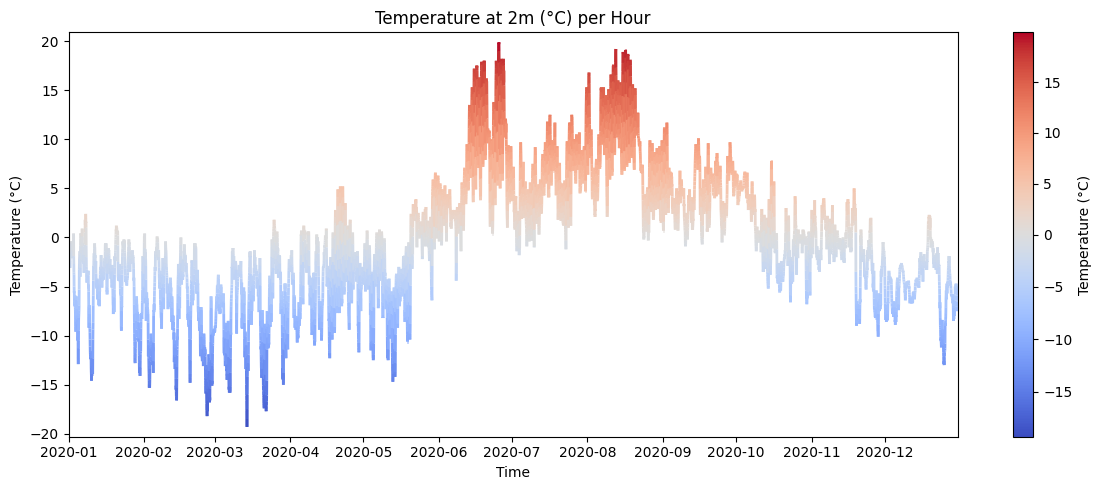

In [6]:
# prepare data
y = df["temperature_2m (°C)"].values
x = pd.to_datetime(df["time"])
x_nums = mdates.date2num(x)

# build line segments for smooth color interpolation
points = np.array([x_nums, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# diverging norm centered at 0 for blue < 0 and red > 0, smooth transition
norm = TwoSlopeNorm(vmin=y.min(), vcenter=0.0, vmax=y.max())
lc = LineCollection(segments, cmap="coolwarm", norm=norm, linewidth=2)
# color each segment by the segment's midpoint temperature
lc.set_array((y[:-1] + y[1:]) / 2)

# plot
plt.figure(figsize=(12, 5))
ax = plt.gca()
ax.add_collection(lc)
ax.set_xlim(x_nums.min(), x_nums.max())
ax.set_ylim(y.min() - 1, y.max() + 1)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title("Temperature at 2m (°C) per Hour")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.colorbar(lc, label="Temperature (°C)")
plt.tight_layout()
plt.show()

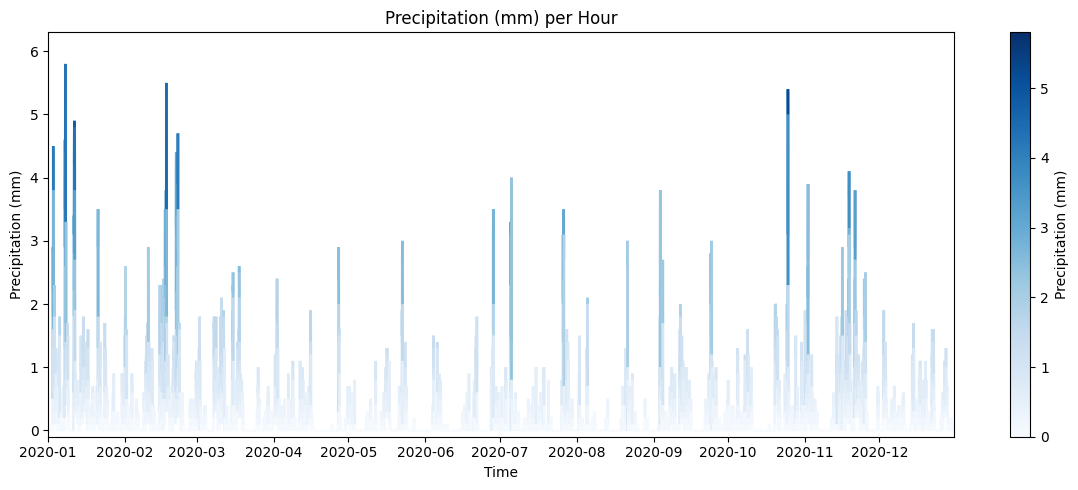

In [ ]:
# prepare data 
y = df["precipitation (mm)"].values
x = pd.to_datetime(df["time"])
x_nums = mdates.date2num(x)

# build line segments
points = np.array([x_nums, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# color scale: from 0 to max precipitation
norm = Normalize(vmin=0, vmax=y.max())
lc = LineCollection(segments, cmap="Blues", norm=norm, linewidth=2)
lc.set_array((y[:-1] + y[1:]) / 2)  # color by midpoint


plt.figure(figsize=(12, 5))
ax = plt.gca()
ax.add_collection(lc)
ax.set_xlim(x_nums.min(), x_nums.max())
ax.set_ylim(y.min() - 0.1, y.max() + 0.5)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.title("Precipitation (mm) per Hour")
plt.xlabel("Time")
plt.ylabel("Precipitation (mm)")
plt.colorbar(lc, label="Precipitation (mm)")
plt.tight_layout()
plt.show()

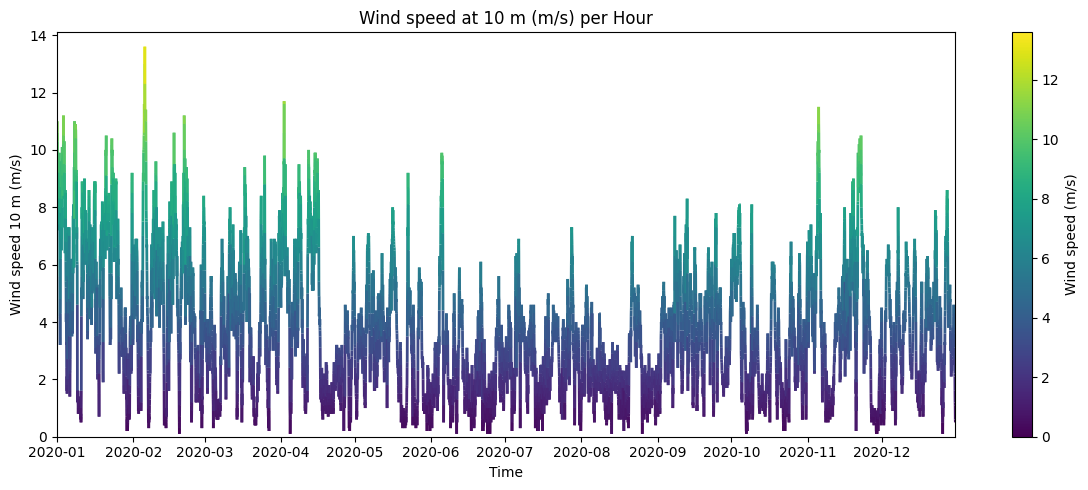

In [15]:
y = df["wind_speed_10m (m/s)"].values
x = pd.to_datetime(df["time"])
x_nums = mdates.date2num(x)

# bygg linjesegmenter (for glidende farge langs kurven)
points = np.array([x_nums, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# fargeskala fra 0 til maks vindhastighet
norm = Normalize(vmin=0, vmax=y.max())
lc = LineCollection(segments, cmap="viridis", norm=norm, linewidth=2)
lc.set_array((y[:-1] + y[1:]) / 2)  # farge etter segmentets midtpunkt

# --- plot ---
plt.figure(figsize=(12, 5))
ax = plt.gca()
ax.add_collection(lc)
ax.set_xlim(x_nums.min(), x_nums.max())
ax.set_ylim(max(0, y.min() - 0.5), y.max() + 0.5)

# Månedsvis tidsskala – lett å lese
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.title("Wind speed at 10 m (m/s) per Hour")
plt.xlabel("Time")
plt.ylabel("Wind speed 10 m (m/s)")
plt.colorbar(lc, label="Wind speed (m/s)")
plt.tight_layout()
plt.show()

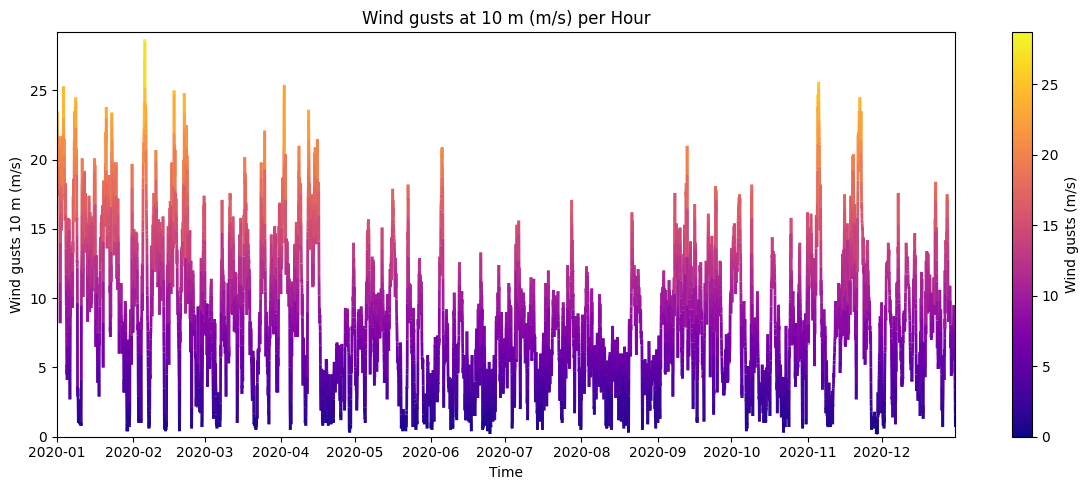

In [18]:
y = df["wind_gusts_10m (m/s)"].values
x = pd.to_datetime(df["time"])
x_nums = mdates.date2num(x)

# bygg linjesegmenter (for glidende farge langs kurven)
points = np.array([x_nums, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# fargeskala fra 0 til maks vindhastighet
norm = Normalize(vmin=0, vmax=y.max())
lc = LineCollection(segments, cmap="plasma", norm=norm, linewidth=2)
lc.set_array((y[:-1] + y[1:]) / 2)  # farge etter segmentets midtpunkt

# --- plot ---
plt.figure(figsize=(12, 5))
ax = plt.gca()
ax.add_collection(lc)
ax.set_xlim(x_nums.min(), x_nums.max())
ax.set_ylim(max(0, y.min() - 0.5), y.max() + 0.5)

# Månedsvis tidsskala – lett å lese
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.title("Wind gusts at 10 m (m/s) per Hour")
plt.xlabel("Time")
plt.ylabel("Wind gusts 10 m (m/s)")
plt.colorbar(lc, label="Wind gusts (m/s)")
plt.tight_layout()
plt.show()

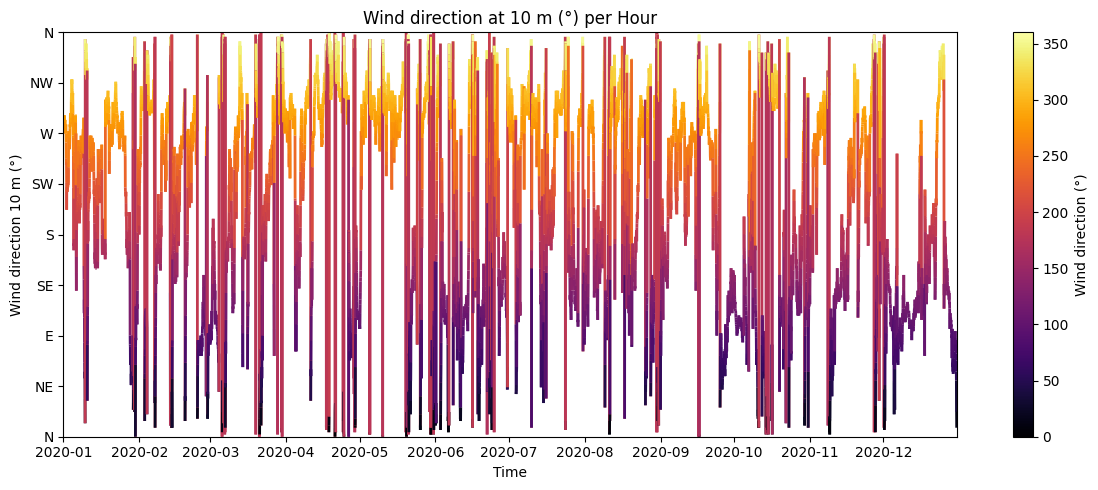

In [ ]:
y = df["wind_direction_10m (°)"].values
x = pd.to_datetime(df["time"])
x_nums = mdates.date2num(x)

# bygg linjesegmenter (for glidende farge langs kurven)
points = np.array([x_nums, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
# fargeskala fra 0 til 360 grader
norm = Normalize(vmin=0, vmax=360)
lc = LineCollection(segments, cmap="inferno", norm=norm, linewidth=2)
lc.set_array((y[:-1] + y[1:]) / 2)  # farge etter segmentets midtpunkt

# plot 
plt.figure(figsize=(12, 5))
ax = plt.gca()                      
ax.add_collection(lc)
ax.set_xlim(x_nums.min(), x_nums.max())
ax.set_ylim(0, 360)
# Månedsvis tidsskala – lett å lese
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.set_yticks(np.arange(0, 361, 45))    
ax.set_yticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N'])
plt.title("Wind direction at 10 m (°) per Hour")
plt.xlabel("Time")
plt.ylabel("Wind direction 10 m (°)")
plt.colorbar(lc, label="Wind direction (°)")
plt.tight_layout()
plt.show()  

### Visualizing All Columns Together 

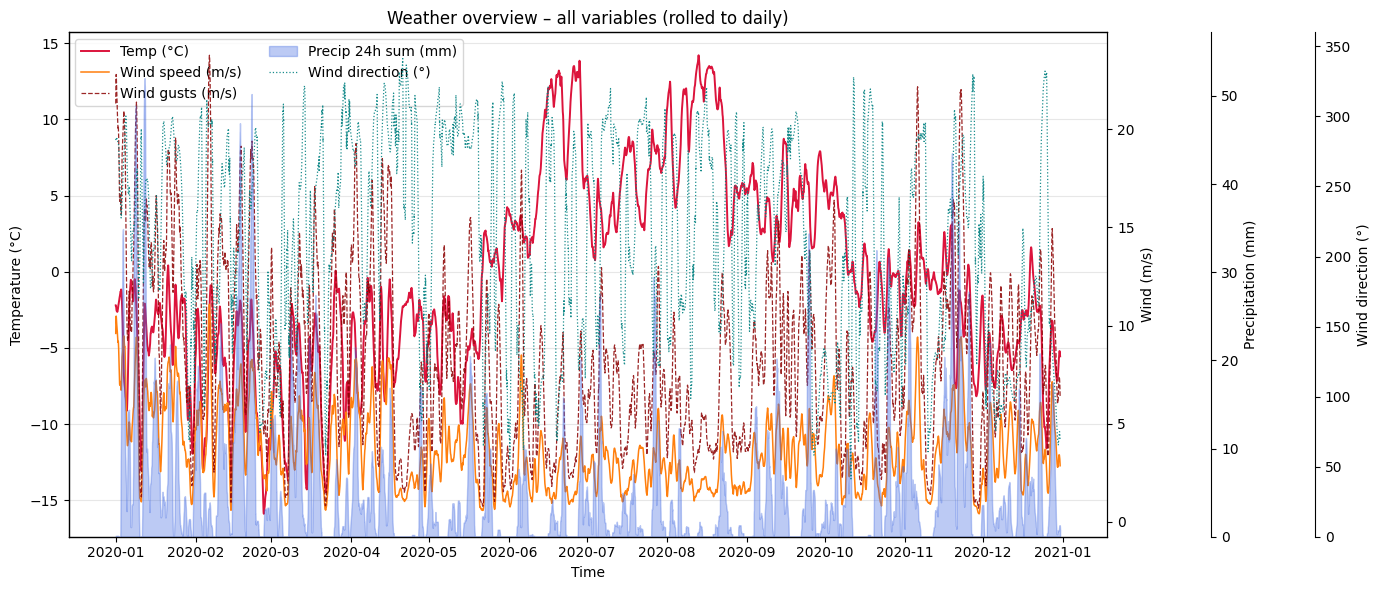

In [5]:
df = df.copy()
df["time"] = pd.to_datetime(df["time"])

# glatt seriene (valgfritt)
temp = df["temperature_2m (°C)"].rolling(24, min_periods=1).mean()
wind = df["wind_speed_10m (m/s)"].rolling(24, min_periods=1).mean()
gust = df["wind_gusts_10m (m/s)"].rolling(24, min_periods=1).mean()
# nedbør passer bedre som døgnsum:
prec = df["precipitation (mm)"].rolling(24, min_periods=1).sum()
wdir = df["wind_direction_10m (°)"].rolling(24, min_periods=1).mean()

x = df["time"]

# --- figur med 3 høyre-akse-spines ---
fig, host = plt.subplots(figsize=(14, 6))
par1 = host.twinx()              # vind (m/s)
par2 = host.twinx()              # nedbør (mm)
par3 = host.twinx()              # vindretning (°)

# flytt ekstra akser ut fra kanten
par2.spines["right"].set_position(("axes", 1.10))
par3.spines["right"].set_position(("axes", 1.20))
for ax in (par2, par3):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)

p1, = host.plot(x, temp, label="Temp (°C)", lw=1.4, color="crimson")
p2, = par1.plot(x, wind, label="Wind speed (m/s)", lw=1.1, color="tab:orange")
p3, = par1.plot(x, gust, label="Wind gusts (m/s)", lw=0.9, alpha=0.85, linestyle="--", color="darkred")
p4 = par2.fill_between(x, 0, prec, label="Precip 24h sum (mm)", color="royalblue", alpha=0.35)
p5, = par3.plot(x, wdir, label="Wind direction (°)", lw=0.9, alpha=0.9, linestyle=":", color="teal")

# aksetitler
host.set_ylabel("Temperature (°C)")
par1.set_ylabel("Wind (m/s)")
par2.set_ylabel("Precipitation (mm)")
par3.set_ylabel("Wind direction (°)")
host.set_xlabel("Time")

# månedsvis tidsakse
host.xaxis.set_major_locator(mdates.MonthLocator())
host.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# grenser som gir luft
host.margins(x=0)
par2.set_ylim(0, max(1, prec.max()) * 1.1)
par3.set_ylim(0, 360)

# rutenett og tittel
host.grid(axis="y", alpha=0.3)
plt.title("Weather overview – all variables (rolled to daily)")

# samlet legend (bruk p4 direkte så fargen vises korrekt)
handles = [p1, p2, p3, p4, p5]
labels = [h.get_label() for h in handles]
host.legend(handles, labels, ncol=2, loc="upper left")

plt.tight_layout()
plt.show()


App idea would be to have different y-axes just like this plot, and automatically change the y-axis to fit the column that is shown. 